In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report, accuracy_score, roc_curve
from sklearn.metrics import RocCurveDisplay

In [3]:
data=pd.read_csv("C:/Users/KUNAL/Downloads/titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

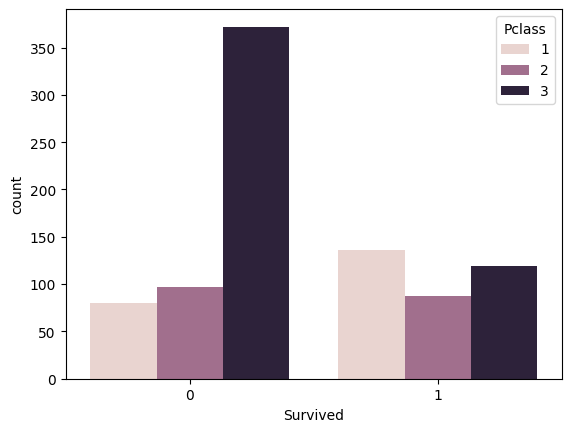

In [10]:
sns.countplot(x="Survived" , data=data , hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

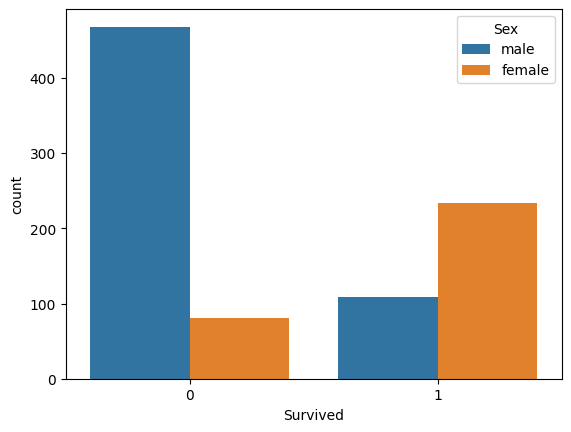

In [11]:
sns.countplot(x="Survived" ,data=data , hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

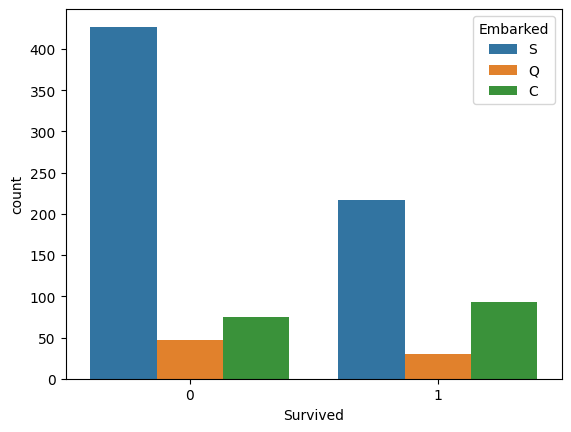

In [12]:
sns.countplot(x="Survived",data=data, hue ="Embarked")

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
data_final= data[['Pclass' ,'Sex' , 'Age' ,'SibSp' ,'Parch','Embarked' ,'Survived']]

In [16]:
data_final.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [17]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [21]:
data_final.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Survived      0
dtype: int64

In [25]:
mean_age=round(data_final["Age"].mean(),3)

In [26]:
mean_age

np.float64(29.699)

In [28]:
data_final["Age"]=data_final["Age"].fillna(mean_age)

C:\Users\KUNAL\AppData\Local\Temp\ipykernel_3452\2592939473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["Age"]=data_final["Age"].fillna(mean_age)


In [29]:
data_final.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
Survived    0
dtype: int64

In [33]:
data_final=data_final.dropna()

In [34]:
data_final.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Survived    0
dtype: int64

In [35]:
len(data_final)

889

<Axes: xlabel='Age'>

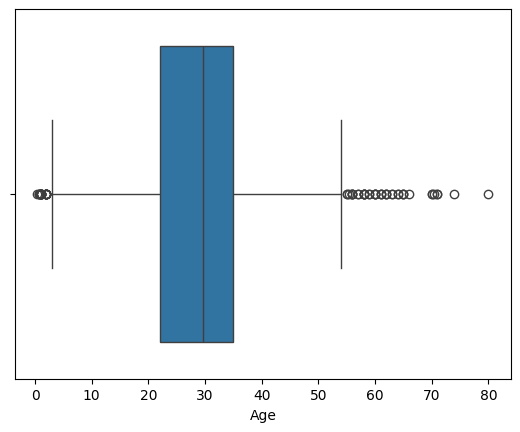

In [36]:
sns.boxplot(x="Age",data=data_final)

In [37]:
len(data_final[data_final["Age"]>70])

5

In [38]:
len(data_final[data_final["Age"]<1])

7

In [64]:
filter1=data_final["Age"]<70
filter2=data_final["Age"]>1
data_new=data_final[filter1 & filter2]
data_new=pd.DataFrame(data_new)

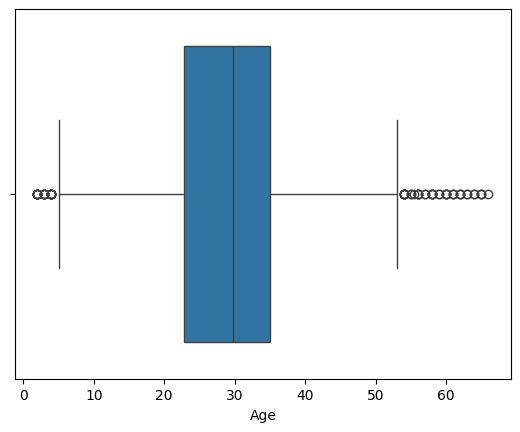

In [65]:
sns.boxplot(x="Age",data=data_new)
plt.show()


In [66]:
data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [67]:
le=LabelEncoder()
data_new["Sex"]=le.fit_transform(data_new["Sex"])
data_new["Embarked"]=le.fit_transform(data_new["Embarked"])

In [48]:
data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,1
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,1
4,3,1,35.0,0,0,2,0


In [68]:
data_new.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived'], dtype='object')

In [69]:
y=data_new["Survived"]
x=data_new.drop(["Survived"],axis=1)

pandas.core.frame.DataFrame

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [74]:
y_pred=model.predict(x_test)

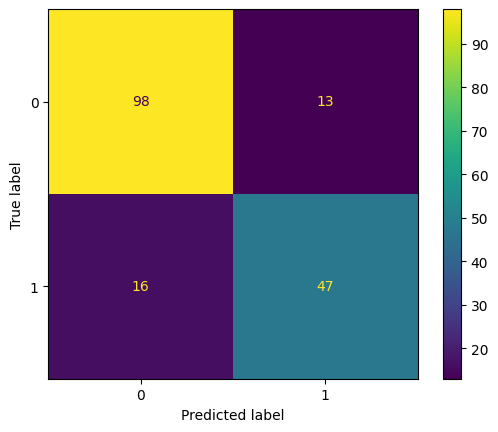

In [76]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
print(disp.plot())

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       111
           1       0.78      0.75      0.76        63

    accuracy                           0.83       174
   macro avg       0.82      0.81      0.82       174
weighted avg       0.83      0.83      0.83       174



In [78]:
(accuracy_score(y_test,y_pred))

0.8333333333333334

In [79]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
df=pd.DataFrame()
df['FPR']=fpr
df['TPR']=tpr
df['Thresholds']=thresholds

In [80]:
print(fpr,tpr,thresholds)

[0.         0.11711712 1.        ] [0.         0.74603175 1.        ] [inf  1.  0.]


C:\Users\KUNAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


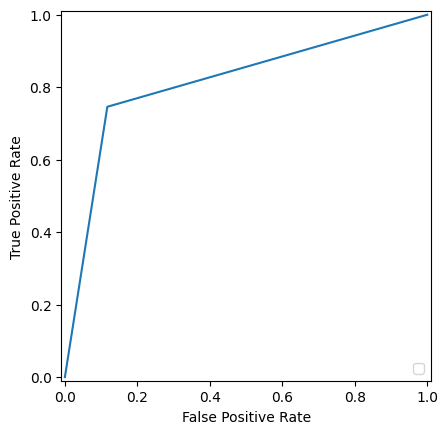

In [85]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()